## Análisis de un Data Set sobre calidad del aire
En este ejemplo se va a mostrar el uso conjunto de las librerías científicas sobre un conjunto de datos.

### Obtención del Data Set y proceso de limpieza de datos
Se van analizar los datos sobre calidad del aire de la ciudad de Madrid correspondientes al año 2017. Para ello, se va usar el portal de datos abiertos del Ayuntamiento de Madrid http://datos.madrid.es/portal/site/egob y concretamente se usará el enlace que lleva a los datos:
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=aecb88a7e2b73410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

Los datos se pueden descargar en archivos de varios formatos: .txt, .csv y .xml.

Una descripción detallada de la estructura de los datos se puede encontrar en el siguiente enlace:
https://datos.madrid.es/FWProjects/egob/contenidos/datasets/ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf

Como primera toma de contacto, se mostrará el csv como un data frame de los datos recuperados

In [5]:
#Importamos la librería pandas para obtener data frames
import pandas as pd
import urllib.request

#Abrimos el csv de 2017 y lo pasamos a un data frame
calidad_aire = pd.read_csv("datos17.csv", delimiter=";")
#Mostramos los 5 primeros registros
calidad_aire

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2017,1,6.0,V,8.0,...,5.0,V,4.0,V,4.0,V,5.0,V,7.0,V
1,28,79,4,1,28079004_1_38,2017,2,8.0,V,4.0,...,4.0,V,4.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2017,3,5.0,V,7.0,...,4.0,V,5.0,V,7.0,V,7.0,V,5.0,V
3,28,79,4,1,28079004_1_38,2017,4,4.0,V,4.0,...,3.0,V,4.0,V,4.0,V,4.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2017,5,4.0,V,5.0,...,5.0,V,5.0,V,4.0,V,4.0,V,5.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,28,79,60,14,28079060_14_6,2017,8,74.0,V,86.0,...,58.0,V,36.0,V,57.0,V,62.0,V,90.0,V
1808,28,79,60,14,28079060_14_6,2017,9,77.0,V,76.0,...,52.0,V,47.0,V,45.0,V,51.0,V,0.0,N
1809,28,79,60,14,28079060_14_6,2017,10,61.0,V,26.0,...,41.0,V,55.0,V,61.0,V,43.0,V,44.0,V
1810,28,79,60,14,28079060_14_6,2017,11,41.0,V,30.0,...,18.0,V,4.0,V,35.0,V,43.0,V,0.0,N


Mostramos las columnas y la dimensión del data frame

In [6]:
print ("Columnas del data frame")
print (calidad_aire.columns)
print ("\n")
print ("Dimensiones del data frame")
print (calidad_aire.shape)

Columnas del data frame
Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'D01', 'V01', 'D02', 'V02', 'D03', 'V03', 'D04', 'V04',
       'D05', 'V05', 'D06', 'V06', 'D07', 'V07', 'D08', 'V08', 'D09', 'V09',
       'D10', 'V10', 'D11', 'V11', 'D12', 'V12', 'D13', 'V13', 'D14', 'V14',
       'D15', 'V15', 'D16', 'V16', 'D17', 'V17', 'D18', 'V18', 'D19', 'V19',
       'D20', 'V20', 'D21', 'V21', 'D22', 'V22', 'D23', 'V23', 'D24', 'V24',
       'D25', 'V25', 'D26', 'V26', 'D27', 'V27', 'D28', 'V28', 'D29', 'V29',
       'D30', 'V30', 'D31', 'V31'],
      dtype='object')


Dimensiones del data frame
(1812, 69)


### Información de las variables

Como hemos visto el data frame contiene 14 variables que tienen el siguiente significado:
* __PROVINCIA__: Código numérico que representa la provincia. En este caso, el 28.
* __MUNICIPIO__: Código numérico que representa el municipio. En este caso, el 79.
* __ESTACIÓN__: Código numérico de hasta dos dígitos que representa la estación. Consultar ANEXO I de la documentación
* __MAGNITUD__: Código numérico de hasta dos dígitos que representa la magnitud.Consultar ANEXO II de la documentación
* __PUNTO MUESTREO__: Código numérico formado por 3 subcódigos. El primer código representa la estación, el segundo código representa la magnitud, y el tercer código representa la técnica de medida.
* __MES__: Mes de la toma de datos. Valor entre 1 y 12.
* __D01-D31__: Medidas tomadas desde el día D01 hasta el día D31 del mes correspondiente.
* __V01-V31__: Validez de las medidas tomadas desde el día D01 hasta el día D31 del mes correspondiente. Puede valer V(Válido), N(No válido), no se conoce(vacío) o bien otra cadena(se considera incorrecto).

Tipología de las variables

In [234]:
print ("Tipo de dato por variable: \n")
print (calidad_aire.dtypes)

Tipo de dato por variable: 

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
ANO                 int64
MES                 int64
D01               float64
V01                object
D02               float64
V02                object
D03               float64
V03                object
D04               float64
V04                object
D05               float64
V05                object
D06               float64
V06                object
D07               float64
V07                object
D08               float64
V08                object
D09               float64
V09                object
D10               float64
V10                object
D11               float64
V11                object
D12               float64
                   ...   
D17               float64
V17                object
D18               float64
V18                object
D19               float64
V19                object
D20      

### Limpieza y preparación del dataframe
En primer lugar se va a prepara el dataframe. Para ello, en primer lugar, se estudia las columnas con valores nulos que existen en el mismo.

In [7]:
L=[]
for i in range(69):
    if calidad_aire.iloc[:,i].isnull().sum()!=0:
        L.append(i)
print(L)

[]


Se obtiene cuantos valores nulos hay en cada columna y el porcentaje

In [8]:
print ("*CANTIDAD de datos nulos por columna en el data frame")
for i in L:
    print(i, calidad_aire.iloc[:,i].isnull().sum())
print ("----------------------------------")
print ("*PORCENTAJE de datos nulos por columna en el data frame")
for i in L:
    print(i, calidad_aire.iloc[:,i].isnull().sum()/len(calidad_aire)*100)

*CANTIDAD de datos nulos por columna en el data frame
----------------------------------
*PORCENTAJE de datos nulos por columna en el data frame


Esto se explica por el hecho de que no todos los meses tienen 31 días. Por tanto, esas columnas aparecen nulas para esos meses.

Se van a rellenar los valores nulos de esas columnas con el valor 0.

In [237]:
for i in L:
    calidad_aire.iloc[:,i]=calidad_aire.iloc[:,i].fillna(0)
L=[]
for i in range(69):
    if calidad_aire.iloc[:,i].isnull().sum()!=0:
        L.append(i)
print("El número de columnas con valores nulos es ",len(L))

El número de columnas con valores nulos es  0


In [239]:
print(calidad_aire.isnull().sum())

PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
D01               0
V01               0
D02               0
V02               0
D03               0
V03               0
D04               0
V04               0
D05               0
V05               0
D06               0
V06               0
D07               0
V07               0
D08               0
V08               0
D09               0
V09               0
D10               0
V10               0
D11               0
V11               0
D12               0
                 ..
D17               0
V17               0
D18               0
V18               0
D19               0
V19               0
D20               0
V20               0
D21               0
V21               0
D22               0
V22               0
D23               0
V23               0
D24               0
V24               0
D25               0
V25               0
D26               0


### Análisis de los datos

Se puede estudiar por ejemplo las medidas de dióxido de nitrógeno por cada estación.

En primer lugar se obtienen las diferentes estaciones

In [240]:
estaciones=calidad_aire.iloc[:,2].unique()
estaciones

array([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50,
       54, 55, 56, 57, 58, 59, 60], dtype=int64)

Se consideran las estaciones para el tipo de contaminante (en este caso el dióxido de nitrogeno es 8).

In [241]:
estaciones=calidad_aire[calidad_aire.iloc[:,3]==8]
estaciones

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
36,28,79,4,8,28079004_8_8,2017,1,50.0,V,62.0,...,53.0,V,30.0,V,40.0,V,41.0,V,59.0,V
37,28,79,4,8,28079004_8_8,2017,2,93.0,V,48.0,...,21.0,V,21.0,V00000N00000N00000N,0.0,0,0.0,0,0.0,0
38,28,79,4,8,28079004_8_8,2017,3,40.0,V,57.0,...,30.0,V,45.0,V,59.0,V,58.0,V,43.0,V
39,28,79,4,8,28079004_8_8,2017,4,25.0,V,31.0,...,20.0,V,26.0,V,39.0,V,25.0,V00000N,0.0,0
40,28,79,4,8,28079004_8_8,2017,5,25.0,V,41.0,...,41.0,V,32.0,V,22.0,V,36.0,V,53.0,V
41,28,79,4,8,28079004_8_8,2017,6,52.0,V,53.0,...,39.0,V,19.0,V,28.0,V,31.0,V00000N,0.0,0
42,28,79,4,8,28079004_8_8,2017,7,11.0,V,19.0,...,56.0,V,63.0,V,57.0,V,42.0,V,40.0,V
43,28,79,4,8,28079004_8_8,2017,8,30.0,V,50.0,...,27.0,V,34.0,V,34.0,V,33.0,V,27.0,V
44,28,79,4,8,28079004_8_8,2017,9,23.0,V,33.0,...,68.0,V,76.0,V,75.0,V,74.0,V00000N,0.0,0
45,28,79,4,8,28079004_8_8,2017,10,36.0,V,52.0,...,68.0,V,58.0,V,56.0,V,46.0,V,56.0,V


En las medidas tomadas algunos días tienen errores. Se van a cambiar estos valores (aquellos que son diferentes de "V") por 0

In [242]:
import warnings
warnings.filterwarnings("ignore")
for k in range(len(estaciones)):
    for j in range(7,68,2):
        if estaciones.iloc[k,j+1]!="V":
            estaciones.iloc[k,j]=0

Se obtienen los subtotales por cada estación y día

In [243]:
L=["D01","D02","D03","D04","D05","D06","D07","D08","D09","D10","D11","D12","D13","D14","D15","D16","D17","D18","D19","D20","D21","D22","D23","D24","D25","D26","D27","D28","D29","D30","D31"]
subtotales=estaciones.groupby(["ESTACION"])[L].sum()
subtotales

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
ESTACION,,,,,,,,,,,,,,,,,,,,,
4,485.0,559.0,579.0,528.0,516.0,492.0,615.0,681.0,653.0,647.0,...,684.0,680.0,669.0,627.0,581.0,521.0,495.0,500.0,288.0,305.0
8,589.0,663.0,717.0,675.0,690.0,665.0,735.0,798.0,785.0,744.0,...,845.0,833.0,855.0,794.0,734.0,693.0,692.0,646.0,383.0,396.0
11,412.0,514.0,557.0,518.0,528.0,459.0,563.0,636.0,593.0,555.0,...,632.0,635.0,648.0,599.0,506.0,462.0,468.0,467.0,270.0,288.0
16,375.0,479.0,504.0,474.0,453.0,379.0,491.0,573.0,547.0,512.0,...,575.0,567.0,578.0,562.0,497.0,444.0,455.0,443.0,257.0,262.0
17,451.0,532.0,586.0,510.0,526.0,540.0,586.0,665.0,663.0,607.0,...,670.0,686.0,684.0,630.0,527.0,499.0,461.0,456.0,278.0,295.0
18,377.0,478.0,519.0,445.0,442.0,422.0,513.0,582.0,566.0,541.0,...,591.0,587.0,602.0,546.0,475.0,432.0,420.0,410.0,247.0,259.0
24,206.0,265.0,312.0,262.0,260.0,234.0,322.0,363.0,311.0,317.0,...,347.0,352.0,377.0,336.0,309.0,243.0,247.0,231.0,136.0,153.0
27,388.0,424.0,450.0,440.0,416.0,369.0,485.0,564.0,533.0,480.0,...,554.0,565.0,596.0,534.0,449.0,423.0,402.0,411.0,262.0,264.0
35,501.0,562.0,596.0,559.0,539.0,546.0,612.0,657.0,649.0,616.0,...,633.0,645.0,654.0,608.0,557.0,515.0,472.0,484.0,304.0,319.0


Se obtiene la suma por estación

In [244]:
totales=subtotales.sum(axis=1)
totales

ESTACION
4     17840.0
8     22191.0
11    16468.0
16    15061.0
17    17479.0
18    15159.0
24     8892.0
27    14471.0
35    17714.0
36    15559.0
38    16534.0
39    15512.0
40    15243.0
47    15674.0
48    14319.0
49    11410.0
50    14767.0
54    14367.0
55    16855.0
56    21221.0
57    12586.0
58     6593.0
59    10279.0
60    12827.0
dtype: float64

Se puede ordenar el resultado para ver la estación que mayor contaminación ha detectado

In [245]:
totales.sort_values()

ESTACION
58     6593.0
24     8892.0
59    10279.0
49    11410.0
57    12586.0
60    12827.0
48    14319.0
54    14367.0
27    14471.0
50    14767.0
16    15061.0
18    15159.0
40    15243.0
39    15512.0
36    15559.0
47    15674.0
11    16468.0
38    16534.0
55    16855.0
17    17479.0
35    17714.0
4     17840.0
56    21221.0
8     22191.0
dtype: float64

In [246]:
totales.index.values

array([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50,
       54, 55, 56, 57, 58, 59, 60], dtype=int64)

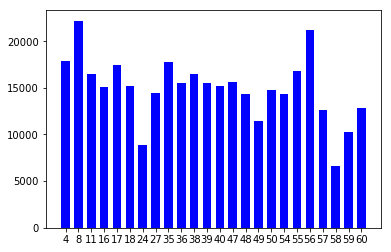

In [247]:
import matplotlib.pyplot as plt
N = len(totales)
x = range(N)
width = 1/1.5
plt.bar(x,totales, width, color="blue",)
plt.xticks(x,totales.index.values)
plt.show()